In [2]:
import re
import requests
from bs4 import BeautifulSoup

In [5]:
# 멜론의 경우 User-Agent를 바꿔줘야 크롤링이 가능합니다.

headers = {'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57'}
 
url = "https://www.melon.com/chart/index.htm"
res = requests.get(url, headers=headers).text
soup = BeautifulSoup(res, "html.parser")

### 멜론 차트 HTML 구조 파악하기

제목의 경우 div.ellipsis.rank01 -> span -> a

가수의 경우 div.ellipsis.rank02 -> a

앨범명의 경우 div.ellipsis.rank03 -> a 의 구조를 가집니다.

 

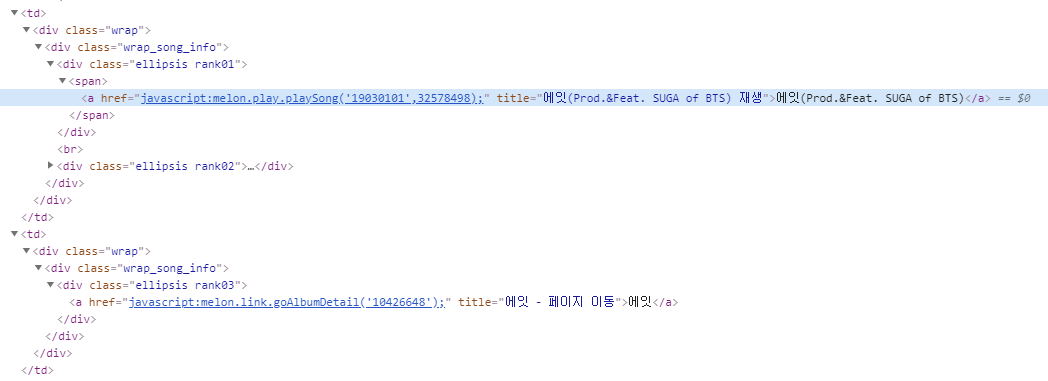

In [7]:
song_name = soup.select("#lst50 > td > div > div > div.ellipsis.rank01 > span > a")
artist_name = soup.select("#frm > div > table > tbody > tr > td > div > div > div.ellipsis.rank02")
 
for i in range(len(artist_name)):
    artist_name[i] = artist_name[i].select("div > a")
    for j in range(len(artist_name[i])):
        artist_name[i][j] = artist_name[i][j].text

album_name = soup.select("#lst50 > td > div > div > div.ellipsis.rank03 > a")

In [8]:
#제목과 앨범명을 텍스트로 뽑아내기

for i in range(len(song_name)):
    song_name[i] = song_name[i].text
    
for i in range(len(album_name)):
    album_name[i] = album_name[i].text

In [9]:
for i in range(len(album_name)):
    print(f'{song_name[i]} / {artist_name[i]} / {album_name[i]}')

에잇(Prod.&Feat. SUGA of BTS) / ['아이유'] / 에잇
깡 Official Remix / ['식케이 (Sik-K)', 'pH-1', '박재범', '김하온 (HAON)'] / 깡 Official Remix
사랑하게 될 줄 알았어 / ['전미도'] / 슬기로운 의사생활 OST Part 11
MORE & MORE / ['TWICE (트와이스)'] / MORE & MORE
아로하 / ['조정석'] / 슬기로운 의사생활 OST Part 3
Candy / ['백현 (BAEKHYUN)'] / Delight - The 2nd Mini Album
ON / ['방탄소년단'] / MAP OF THE SOUL : 7
살짝 설렜어 (Nonstop) / ['오마이걸'] / NONSTOP
작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey) / ['방탄소년단'] / MAP OF THE SOUL : PERSONA
나비와 고양이 (feat.백현 (BAEKHYUN)) / ['볼빨간사춘기'] / 사춘기집Ⅱ 꽃 본 나비
너를 사랑하고 있어 / ['백현 (BAEKHYUN)'] / 낭만닥터 김사부 2 OST Part.1
00:00 (Zero O’Clock) / ['방탄소년단'] / MAP OF THE SOUL : 7
Bungee / ['백현 (BAEKHYUN)'] / Delight - The 2nd Mini Album
Love Again / ['백현 (BAEKHYUN)'] / Delight - The 2nd Mini Album
너에게 난, 나에게 넌 / ['미도와 파라솔'] / 슬기로운 의사생활 OST Part 12
친구 / ['방탄소년단'] / MAP OF THE SOUL : 7
Black Swan / ['방탄소년단'] / MAP OF THE SOUL : 7
Poppin' / ['백현 (BAEKHYUN)'] / Delight - The 2nd Mini Album
Filter / ['방탄소년단'] / MAP OF THE SOUL : 7
좋은 사람 있으면 소

In [11]:
for i in range(len(artist_name)):
    artist_name[i] = ', '.join(artist_name[i])